# DE LAGREVOL Regis & LI Ludovic

In [1]:
#pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [3]:
data=pd.read_csv("SkillCraft1_Dataset.csv")
data.rename(columns={'GameID': 'GamerID'}, inplace=True) #erreur sur le nom de la colonne
data

,GamerID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


### Nettoyage du dataset

In [4]:
data.replace("?",np.nan,inplace=True) 
data.dropna(inplace=True) # perte de 57 lignes, négligeable
data

,GamerID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,9261,4,20,8,400,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,16,56,1500,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,21,8,100,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,20,28,400,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000


In [5]:
data.dtypes

GamerID                   int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [6]:
data["Age"]=pd.to_numeric(data["Age"])
data["HoursPerWeek"]=pd.to_numeric(data["HoursPerWeek"])
data["TotalHours"]=pd.to_numeric(data["TotalHours"])

In [7]:
data.dtypes

GamerID                   int64
LeagueIndex               int64
Age                       int64
HoursPerWeek              int64
TotalHours                int64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

### Matrice de corrélation

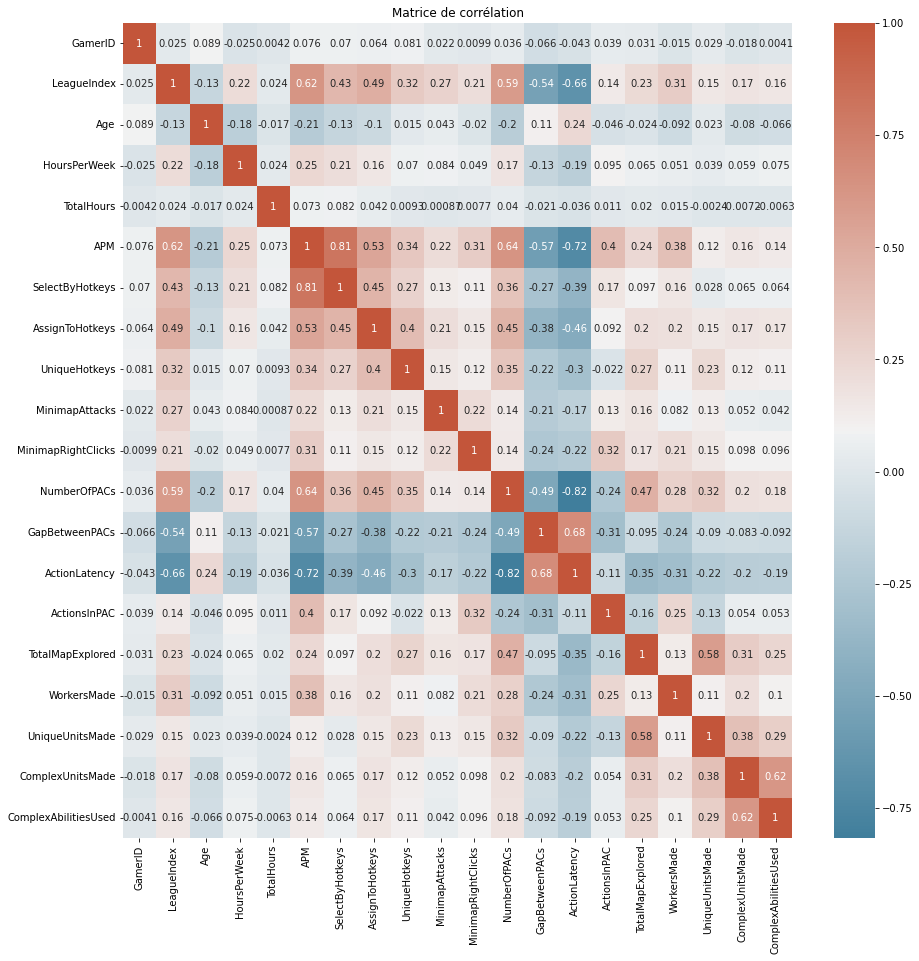

In [8]:
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=data.corr()
sns.heatmap(corr,cmap=cmap,xticklabels=corr.columns.values,yticklabels=corr.columns.values,ax=ax,annot=True)
plt.title("Matrice de corrélation")
plt.show()

### Treemap

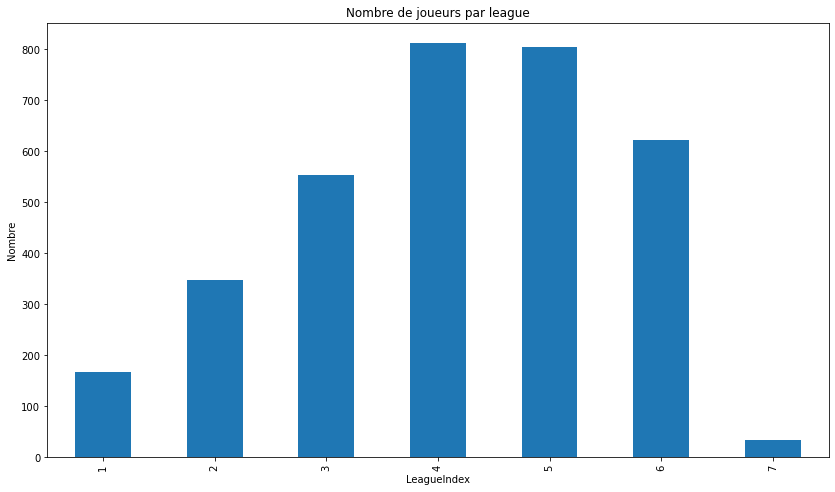

In [9]:
plt.figure(figsize=(14,8))
data["LeagueIndex"].value_counts()[[1,2,3,4,5,6,7]].plot(kind='bar',title="Nombre de joueurs par league")
plt.xlabel("LeagueIndex")
plt.ylabel("Nombre")
plt.show()

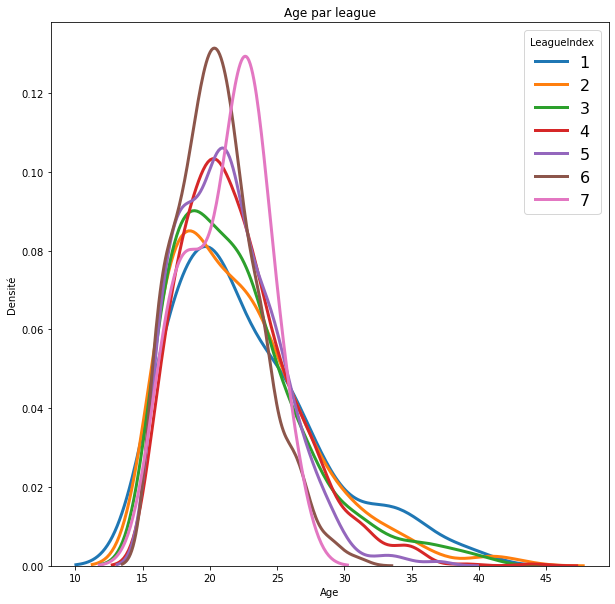

In [10]:
labels = [1,2,3,4,5,6,7,8]

plt.figure(figsize=(10,10))
for label in labels:
    subset = data[data['LeagueIndex'] == label]
    sns.distplot(subset['Age'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = label)

plt.legend(prop={'size': 16}, title = 'LeagueIndex')
plt.title('Age par league')
plt.xlabel('Age')
plt.ylabel('Densité')
plt.show()

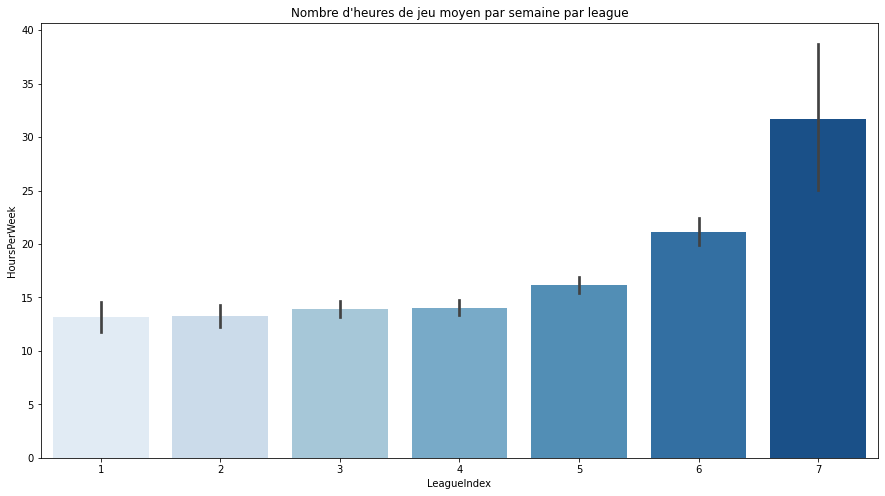

In [11]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='LeagueIndex', y='HoursPerWeek', data=data, palette="Blues").set_title("Nombre d'heures de jeu moyen par semaine par league")
plt.show()

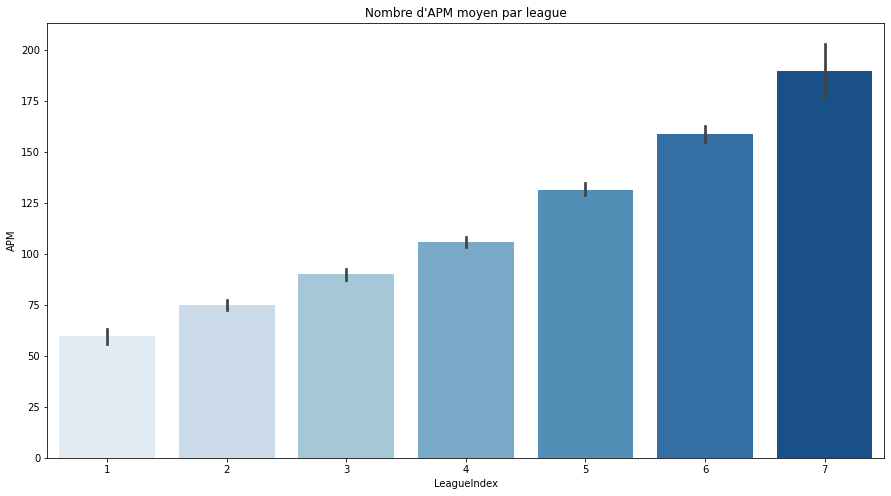

In [12]:
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='LeagueIndex', y='APM', data=data, palette="Blues").set_title("Nombre d'APM moyen par league")
plt.show()

### PCA

In [13]:
#Standardisation des données

x = data.drop(['GamerID',"LeagueIndex"], axis=1).values # GamerID nous sert à rien et LeagueIndex correspond à notre label
x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[ 1.27198242, -0.49399595,  0.11778889, ..., -0.29107556,
        -0.5380093 , -0.53437903],
       [ 0.32089829, -0.49399595,  0.23329208, ..., -0.82906572,
        -0.5380093 ,  0.24711416],
       [ 1.98529551, -0.49399595, -0.04391557, ..., -0.29107556,
        -0.5380093 ,  0.17629523],
       ...,
       [-0.15464377, -0.66118225, -0.04969073, ...,  0.2469146 ,
        -0.5380093 , -0.53437903],
       [-0.3924148 ,  1.01068076, -0.03236525, ..., -0.82906572,
        -0.5380093 , -0.53437903],
       [ 0.08312726, -0.82836855, -0.03236525, ...,  0.78490476,
        -0.5380093 , -0.33148145]])

In [14]:
np.mean(x_scaled),np.std(x_scaled) # On a bien une moyenne d'environ 0 et un ecart-type de 1

(-3.48861771934674e-17, 1.0)

In [15]:
#ACP

pca=PCA(n_components=2)
principalComponents_data=pca.fit_transform(x_scaled)

In [16]:
principalComponents_data_df=pd.DataFrame(data = principalComponents_data, columns = ['principal component 1', 'principal component 2'])
principalComponents_data_df

,principal component 1,principal component 2
0,-1.274624,0.047788
1,-0.745446,-0.493406
2,1.464882,0.585331
3,0.322655,0.090166
4,0.669913,-2.642926
...,...,...
3333,-1.736654,0.037872
3334,-3.695962,0.264738
3335,-0.577725,-0.144996
3336,-0.100014,-1.688524


In [17]:
pca.explained_variance_ratio_

array([0.26761659, 0.11463656])

In [18]:
finalDf = pd.concat([principalComponents_data_df, data[['LeagueIndex']].reset_index(drop=True)], axis = 1) # 2 composantes principales avec les labels
finalDf

,principal component 1,principal component 2,LeagueIndex
0,-1.274624,0.047788,5
1,-0.745446,-0.493406,5
2,1.464882,0.585331,4
3,0.322655,0.090166,3
4,0.669913,-2.642926,3
...,...,...,...
3333,-1.736654,0.037872,4
3334,-3.695962,0.264738,5
3335,-0.577725,-0.144996,4
3336,-0.100014,-1.688524,3


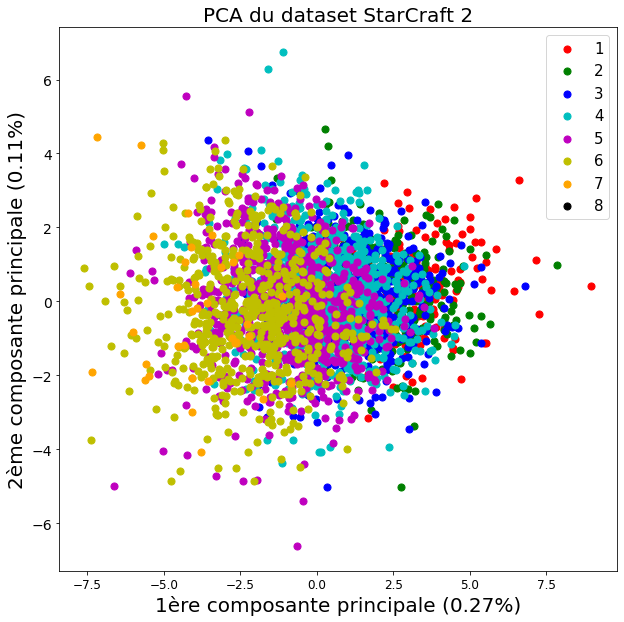

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('1ère composante principale'+' ('+str(round(pca.explained_variance_ratio_[0],2))+"%)",fontsize=20)
plt.ylabel('2ème composante principale'+' ('+str(round(pca.explained_variance_ratio_[1],2))+"%)",fontsize=20)
plt.title("PCA du dataset StarCraft 2",fontsize=20)
targets = [1,2,3,4,5,6,7,8]
colors = ['r','g','b','c','m','y','orange','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LeagueIndex'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

### K-means

In [20]:
# Clustering

kmeans = KMeans(n_clusters=7) 
label=kmeans.fit_predict(principalComponents_data)

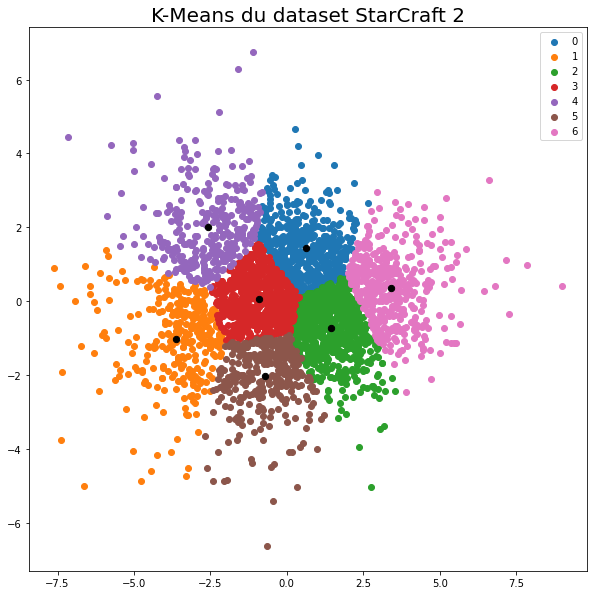

In [21]:
unique_labels = np.unique(label)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,10))
plt.title("K-Means du dataset StarCraft 2",fontsize=20)
for i in unique_labels:
    plt.scatter(principalComponents_data[label == i , 0] , principalComponents_data[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 40, color = "k")
plt.legend()
plt.show()

### TensorFlow

In [22]:
X=pd.DataFrame(x_scaled)
# ensure all data are floating point values
X = X.astype('float32')
y=data["LeagueIndex"]
y=y-1
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(7, activation = 'relu'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

(2236, 18) (1102, 18) (2236,) (1102,)


In [23]:
# fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=1500, batch_size=10000)

Epoch 1/1500
1/1 [==============================] - 1s 592ms/step - loss: 6.1970 - accuracy: 0.0648 - val_loss: 5.3347 - val_accuracy: 0.0717
Epoch 2/1500
1/1 [==============================] - 0s 42ms/step - loss: 5.3715 - accuracy: 0.0729 - val_loss: 4.5674 - val_accuracy: 0.0880
Epoch 3/1500
1/1 [==============================] - 0s 32ms/step - loss: 4.5887 - accuracy: 0.0805 - val_loss: 3.9443 - val_accuracy: 0.0989
Epoch 4/1500
1/1 [==============================] - 0s 30ms/step - loss: 4.0193 - accuracy: 0.0930 - val_loss: 3.4908 - val_accuracy: 0.1053
Epoch 5/1500
1/1 [==============================] - 0s 29ms/step - loss: 3.4849 - accuracy: 0.1055 - val_loss: 3.0869 - val_accuracy: 0.1125
Epoch 6/1500
1/1 [==============================] - 0s 33ms/step - loss: 3.0590 - accuracy: 0.1109 - val_loss: 2.7396 - val_accuracy: 0.1125
Epoch 7/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.7396 - accuracy: 0.1136 - val_loss: 2.5153 - val_accuracy: 0.1152
Epoch 8/1500

Epoch 59/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.6516 - accuracy: 0.2831 - val_loss: 1.6984 - val_accuracy: 0.2595
Epoch 60/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.6455 - accuracy: 0.2822 - val_loss: 1.6929 - val_accuracy: 0.2586
Epoch 61/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.6396 - accuracy: 0.2822 - val_loss: 1.6970 - val_accuracy: 0.2623
Epoch 62/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.6382 - accuracy: 0.2795 - val_loss: 1.6907 - val_accuracy: 0.2641
Epoch 63/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.6318 - accuracy: 0.2782 - val_loss: 1.6846 - val_accuracy: 0.2650
Epoch 64/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.6302 - accuracy: 0.2782 - val_loss: 1.6788 - val_accuracy: 0.2659
Epoch 65/1500
1/1 [==============================] - 0s 26ms/step - loss: 1.6236 - accuracy: 0.2764 - val_loss: 1.6831 - val_accuracy: 0.2659
Epoch 

1/1 [==============================] - 0s 26ms/step - loss: 1.4796 - accuracy: 0.2929 - val_loss: 1.6704 - val_accuracy: 0.2777
Epoch 117/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.4784 - accuracy: 0.2938 - val_loss: 1.6702 - val_accuracy: 0.2813
Epoch 118/1500
1/1 [==============================] - 0s 25ms/step - loss: 1.4773 - accuracy: 0.2947 - val_loss: 1.6700 - val_accuracy: 0.2813
Epoch 119/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.4762 - accuracy: 0.2947 - val_loss: 1.6697 - val_accuracy: 0.2777
Epoch 120/1500
1/1 [==============================] - 0s 26ms/step - loss: 1.4751 - accuracy: 0.2938 - val_loss: 1.6692 - val_accuracy: 0.2777
Epoch 121/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.4740 - accuracy: 0.2929 - val_loss: 1.6688 - val_accuracy: 0.2777
Epoch 122/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.4729 - accuracy: 0.2938 - val_loss: 1.6684 - val_accuracy: 0.2777
Epoch 123/1500

1/1 [==============================] - 0s 26ms/step - loss: 1.4284 - accuracy: 0.3189 - val_loss: 1.7321 - val_accuracy: 0.2877
Epoch 174/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.4275 - accuracy: 0.3198 - val_loss: 1.7415 - val_accuracy: 0.2877
Epoch 175/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.4267 - accuracy: 0.3207 - val_loss: 1.7414 - val_accuracy: 0.2886
Epoch 176/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.4259 - accuracy: 0.3207 - val_loss: 1.7412 - val_accuracy: 0.2895
Epoch 177/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.4251 - accuracy: 0.3198 - val_loss: 1.7411 - val_accuracy: 0.2922
Epoch 178/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.4243 - accuracy: 0.3198 - val_loss: 1.7411 - val_accuracy: 0.2913
Epoch 179/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.4235 - accuracy: 0.3193 - val_loss: 1.7413 - val_accuracy: 0.2904
Epoch 180/1500

1/1 [==============================] - 0s 29ms/step - loss: 1.3800 - accuracy: 0.3386 - val_loss: 1.7928 - val_accuracy: 0.3094
Epoch 231/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.3789 - accuracy: 0.3390 - val_loss: 1.7928 - val_accuracy: 0.3103
Epoch 232/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.3778 - accuracy: 0.3372 - val_loss: 1.7926 - val_accuracy: 0.3113
Epoch 233/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.3766 - accuracy: 0.3381 - val_loss: 1.7926 - val_accuracy: 0.3094
Epoch 234/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.3754 - accuracy: 0.3381 - val_loss: 1.7925 - val_accuracy: 0.3113
Epoch 235/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.3742 - accuracy: 0.3377 - val_loss: 1.7932 - val_accuracy: 0.3094
Epoch 236/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3730 - accuracy: 0.3394 - val_loss: 1.7948 - val_accuracy: 0.3085
Epoch 237/1500

1/1 [==============================] - 0s 43ms/step - loss: 1.3120 - accuracy: 0.3484 - val_loss: 1.9488 - val_accuracy: 0.3140
Epoch 288/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.3110 - accuracy: 0.3479 - val_loss: 1.9572 - val_accuracy: 0.3122
Epoch 289/1500
1/1 [==============================] - 0s 43ms/step - loss: 1.3100 - accuracy: 0.3466 - val_loss: 1.9579 - val_accuracy: 0.3122
Epoch 290/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.3091 - accuracy: 0.3470 - val_loss: 1.9589 - val_accuracy: 0.3113
Epoch 291/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.3081 - accuracy: 0.3466 - val_loss: 1.9602 - val_accuracy: 0.3103
Epoch 292/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.3071 - accuracy: 0.3462 - val_loss: 1.9617 - val_accuracy: 0.3103
Epoch 293/1500
1/1 [==============================] - 0s 41ms/step - loss: 1.3062 - accuracy: 0.3466 - val_loss: 1.9633 - val_accuracy: 0.3094
Epoch 294/1500

1/1 [==============================] - 0s 33ms/step - loss: 1.2537 - accuracy: 0.3716 - val_loss: 2.1816 - val_accuracy: 0.3076
Epoch 345/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2525 - accuracy: 0.3730 - val_loss: 2.1934 - val_accuracy: 0.3076
Epoch 346/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2514 - accuracy: 0.3708 - val_loss: 2.2042 - val_accuracy: 0.3085
Epoch 347/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2503 - accuracy: 0.3712 - val_loss: 2.2120 - val_accuracy: 0.3067
Epoch 348/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2491 - accuracy: 0.3708 - val_loss: 2.2120 - val_accuracy: 0.3067
Epoch 349/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.2480 - accuracy: 0.3703 - val_loss: 2.2135 - val_accuracy: 0.3058
Epoch 350/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2468 - accuracy: 0.3699 - val_loss: 2.2233 - val_accuracy: 0.3058
Epoch 351/1500

1/1 [==============================] - 0s 31ms/step - loss: 1.1735 - accuracy: 0.4164 - val_loss: 2.6230 - val_accuracy: 0.3330
Epoch 402/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.1716 - accuracy: 0.4182 - val_loss: 2.6437 - val_accuracy: 0.3312
Epoch 403/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.1706 - accuracy: 0.4177 - val_loss: 2.6487 - val_accuracy: 0.3285
Epoch 404/1500
1/1 [==============================] - 0s 45ms/step - loss: 1.1687 - accuracy: 0.4195 - val_loss: 2.6644 - val_accuracy: 0.3294
Epoch 405/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.1668 - accuracy: 0.4222 - val_loss: 2.6739 - val_accuracy: 0.3285
Epoch 406/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.1649 - accuracy: 0.4231 - val_loss: 2.6850 - val_accuracy: 0.3294
Epoch 407/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.1630 - accuracy: 0.4284 - val_loss: 2.6947 - val_accuracy: 0.3276
Epoch 408/1500

1/1 [==============================] - 0s 33ms/step - loss: 1.0713 - accuracy: 0.4835 - val_loss: 3.3810 - val_accuracy: 0.3358
Epoch 459/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0677 - accuracy: 0.4821 - val_loss: 3.3593 - val_accuracy: 0.3367
Epoch 460/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.0662 - accuracy: 0.4826 - val_loss: 3.3789 - val_accuracy: 0.3385
Epoch 461/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.0657 - accuracy: 0.4830 - val_loss: 3.3867 - val_accuracy: 0.3421
Epoch 462/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.0657 - accuracy: 0.4817 - val_loss: 3.3994 - val_accuracy: 0.3412
Epoch 463/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.0673 - accuracy: 0.4826 - val_loss: 3.5233 - val_accuracy: 0.3394
Epoch 464/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.0619 - accuracy: 0.4866 - val_loss: 3.5567 - val_accuracy: 0.3376
Epoch 465/1500

1/1 [==============================] - 0s 33ms/step - loss: 1.2709 - accuracy: 0.4280 - val_loss: 2.1044 - val_accuracy: 0.3494
Epoch 516/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.2679 - accuracy: 0.4275 - val_loss: 2.1427 - val_accuracy: 0.3539
Epoch 517/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.2651 - accuracy: 0.4298 - val_loss: 2.1477 - val_accuracy: 0.3539
Epoch 518/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.2625 - accuracy: 0.4298 - val_loss: 2.1592 - val_accuracy: 0.3548
Epoch 519/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.2607 - accuracy: 0.4311 - val_loss: 2.1690 - val_accuracy: 0.3566
Epoch 520/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.2577 - accuracy: 0.4311 - val_loss: 2.1714 - val_accuracy: 0.3575
Epoch 521/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2546 - accuracy: 0.4334 - val_loss: 2.1838 - val_accuracy: 0.3584
Epoch 522/1500

1/1 [==============================] - 0s 33ms/step - loss: 1.1321 - accuracy: 0.4750 - val_loss: 2.8324 - val_accuracy: 0.3503
Epoch 573/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.1299 - accuracy: 0.4763 - val_loss: 2.8425 - val_accuracy: 0.3503
Epoch 574/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.1276 - accuracy: 0.4794 - val_loss: 2.8535 - val_accuracy: 0.3494
Epoch 575/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1253 - accuracy: 0.4808 - val_loss: 2.8816 - val_accuracy: 0.3475
Epoch 576/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1231 - accuracy: 0.4821 - val_loss: 2.8974 - val_accuracy: 0.3448
Epoch 577/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.1217 - accuracy: 0.4817 - val_loss: 2.9275 - val_accuracy: 0.3466
Epoch 578/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1194 - accuracy: 0.4826 - val_loss: 2.9451 - val_accuracy: 0.3485
Epoch 579/1500

1/1 [==============================] - 0s 38ms/step - loss: 1.2535 - accuracy: 0.4423 - val_loss: 2.4600 - val_accuracy: 0.3702
Epoch 630/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.2585 - accuracy: 0.4419 - val_loss: 2.4932 - val_accuracy: 0.3711
Epoch 631/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2536 - accuracy: 0.4405 - val_loss: 2.4861 - val_accuracy: 0.3702
Epoch 632/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.2527 - accuracy: 0.4378 - val_loss: 2.5086 - val_accuracy: 0.3702
Epoch 633/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.2517 - accuracy: 0.4369 - val_loss: 2.5529 - val_accuracy: 0.3721
Epoch 634/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2452 - accuracy: 0.4396 - val_loss: 2.6102 - val_accuracy: 0.3748
Epoch 635/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.2428 - accuracy: 0.4410 - val_loss: 2.6237 - val_accuracy: 0.3739
Epoch 636/1500

1/1 [==============================] - 0s 35ms/step - loss: 1.1266 - accuracy: 0.4741 - val_loss: 2.9089 - val_accuracy: 0.3457
Epoch 687/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.1235 - accuracy: 0.4736 - val_loss: 2.9031 - val_accuracy: 0.3448
Epoch 688/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.1205 - accuracy: 0.4745 - val_loss: 2.9194 - val_accuracy: 0.3439
Epoch 689/1500
1/1 [==============================] - 0s 48ms/step - loss: 1.1177 - accuracy: 0.4767 - val_loss: 2.9187 - val_accuracy: 0.3430
Epoch 690/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.1151 - accuracy: 0.4790 - val_loss: 2.9086 - val_accuracy: 0.3430
Epoch 691/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.1128 - accuracy: 0.4794 - val_loss: 2.9263 - val_accuracy: 0.3412
Epoch 692/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.1104 - accuracy: 0.4812 - val_loss: 2.9314 - val_accuracy: 0.3403
Epoch 693/1500

1/1 [==============================] - 0s 34ms/step - loss: 1.0953 - accuracy: 0.5022 - val_loss: 2.7861 - val_accuracy: 0.3439
Epoch 744/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.0931 - accuracy: 0.5022 - val_loss: 2.7772 - val_accuracy: 0.3448
Epoch 745/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.0912 - accuracy: 0.5018 - val_loss: 2.7691 - val_accuracy: 0.3448
Epoch 746/1500
1/1 [==============================] - 0s 40ms/step - loss: 1.0885 - accuracy: 0.5022 - val_loss: 2.7711 - val_accuracy: 0.3457
Epoch 747/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.0866 - accuracy: 0.5040 - val_loss: 2.7825 - val_accuracy: 0.3466
Epoch 748/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.0845 - accuracy: 0.5040 - val_loss: 2.8211 - val_accuracy: 0.3475
Epoch 749/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.0810 - accuracy: 0.5027 - val_loss: 2.8480 - val_accuracy: 0.3475
Epoch 750/1500

1/1 [==============================] - 0s 32ms/step - loss: 1.2412 - accuracy: 0.4615 - val_loss: 2.9422 - val_accuracy: 0.3421
Epoch 801/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2294 - accuracy: 0.4486 - val_loss: 2.7813 - val_accuracy: 0.3376
Epoch 802/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.2427 - accuracy: 0.4441 - val_loss: 2.6932 - val_accuracy: 0.3412
Epoch 803/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.2252 - accuracy: 0.4414 - val_loss: 2.5602 - val_accuracy: 0.3466
Epoch 804/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.2131 - accuracy: 0.4401 - val_loss: 2.4778 - val_accuracy: 0.3430
Epoch 805/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.2159 - accuracy: 0.4463 - val_loss: 2.4201 - val_accuracy: 0.3376
Epoch 806/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.2133 - accuracy: 0.4513 - val_loss: 2.3266 - val_accuracy: 0.3412
Epoch 807/1500

1/1 [==============================] - 0s 30ms/step - loss: 1.1772 - accuracy: 0.4575 - val_loss: 2.5812 - val_accuracy: 0.3530
Epoch 858/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.1741 - accuracy: 0.4584 - val_loss: 2.5954 - val_accuracy: 0.3521
Epoch 859/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.1669 - accuracy: 0.4606 - val_loss: 2.6143 - val_accuracy: 0.3466
Epoch 860/1500
1/1 [==============================] - 0s 28ms/step - loss: 1.1643 - accuracy: 0.4602 - val_loss: 2.6171 - val_accuracy: 0.3475
Epoch 861/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.1617 - accuracy: 0.4620 - val_loss: 2.6221 - val_accuracy: 0.3485
Epoch 862/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.1589 - accuracy: 0.4629 - val_loss: 2.6505 - val_accuracy: 0.3485
Epoch 863/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.1561 - accuracy: 0.4647 - val_loss: 2.6687 - val_accuracy: 0.3475
Epoch 864/1500

1/1 [==============================] - 0s 33ms/step - loss: 1.0463 - accuracy: 0.5018 - val_loss: 3.2826 - val_accuracy: 0.3621
Epoch 915/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.0445 - accuracy: 0.5013 - val_loss: 3.2829 - val_accuracy: 0.3612
Epoch 916/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.0436 - accuracy: 0.5013 - val_loss: 3.2846 - val_accuracy: 0.3630
Epoch 917/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.0426 - accuracy: 0.5018 - val_loss: 3.3004 - val_accuracy: 0.3630
Epoch 918/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.0416 - accuracy: 0.5022 - val_loss: 3.2939 - val_accuracy: 0.3639
Epoch 919/1500
1/1 [==============================] - 0s 31ms/step - loss: 1.0398 - accuracy: 0.5027 - val_loss: 3.2860 - val_accuracy: 0.3639
Epoch 920/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.0397 - accuracy: 0.5027 - val_loss: 3.2814 - val_accuracy: 0.3630
Epoch 921/1500

1/1 [==============================] - 0s 32ms/step - loss: 1.3095 - accuracy: 0.4217 - val_loss: 2.1356 - val_accuracy: 0.3385
Epoch 972/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.3068 - accuracy: 0.4217 - val_loss: 2.1305 - val_accuracy: 0.3430
Epoch 973/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.3042 - accuracy: 0.4199 - val_loss: 2.1397 - val_accuracy: 0.3430
Epoch 974/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.3016 - accuracy: 0.4213 - val_loss: 2.1494 - val_accuracy: 0.3457
Epoch 975/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.2992 - accuracy: 0.4208 - val_loss: 2.1581 - val_accuracy: 0.3457
Epoch 976/1500
1/1 [==============================] - 0s 39ms/step - loss: 1.2968 - accuracy: 0.4204 - val_loss: 2.1598 - val_accuracy: 0.3439
Epoch 977/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.2945 - accuracy: 0.4199 - val_loss: 2.1813 - val_accuracy: 0.3439
Epoch 978/1500

1/1 [==============================] - 0s 35ms/step - loss: 1.1984 - accuracy: 0.4423 - val_loss: 2.4696 - val_accuracy: 0.3575
Epoch 1029/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.1966 - accuracy: 0.4436 - val_loss: 2.4790 - val_accuracy: 0.3575
Epoch 1030/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.1948 - accuracy: 0.4445 - val_loss: 2.4799 - val_accuracy: 0.3575
Epoch 1031/1500
1/1 [==============================] - 0s 35ms/step - loss: 1.1931 - accuracy: 0.4436 - val_loss: 2.4808 - val_accuracy: 0.3584
Epoch 1032/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1915 - accuracy: 0.4450 - val_loss: 2.4820 - val_accuracy: 0.3584
Epoch 1033/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1898 - accuracy: 0.4468 - val_loss: 2.4855 - val_accuracy: 0.3621
Epoch 1034/1500
1/1 [==============================] - 0s 36ms/step - loss: 1.1880 - accuracy: 0.4490 - val_loss: 2.4942 - val_accuracy: 0.3612
Epoch 10

1/1 [==============================] - 0s 40ms/step - loss: 1.1238 - accuracy: 0.4794 - val_loss: 2.7373 - val_accuracy: 0.3593
Epoch 1086/1500
1/1 [==============================] - 0s 34ms/step - loss: 1.1190 - accuracy: 0.4812 - val_loss: 2.7856 - val_accuracy: 0.3621
Epoch 1087/1500
1/1 [==============================] - 0s 33ms/step - loss: 1.1212 - accuracy: 0.4781 - val_loss: 2.8070 - val_accuracy: 0.3630
Epoch 1088/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.1176 - accuracy: 0.4785 - val_loss: 2.8774 - val_accuracy: 0.3603
Epoch 1089/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.1219 - accuracy: 0.4763 - val_loss: 2.8863 - val_accuracy: 0.3584
Epoch 1090/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.1249 - accuracy: 0.4772 - val_loss: 2.9042 - val_accuracy: 0.3603
Epoch 1091/1500
1/1 [==============================] - 0s 30ms/step - loss: 1.1249 - accuracy: 0.4785 - val_loss: 2.9106 - val_accuracy: 0.3621
Epoch 10

1/1 [==============================] - 0s 43ms/step - loss: 1.0796 - accuracy: 0.4884 - val_loss: 3.2233 - val_accuracy: 0.3584
Epoch 1143/1500
1/1 [==============================] - 0s 41ms/step - loss: 1.0785 - accuracy: 0.4884 - val_loss: 3.2234 - val_accuracy: 0.3593
Epoch 1144/1500
1/1 [==============================] - 0s 41ms/step - loss: 1.0775 - accuracy: 0.4888 - val_loss: 3.2246 - val_accuracy: 0.3593
Epoch 1145/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.0764 - accuracy: 0.4888 - val_loss: 3.2282 - val_accuracy: 0.3584
Epoch 1146/1500
1/1 [==============================] - 0s 37ms/step - loss: 1.0754 - accuracy: 0.4893 - val_loss: 3.2396 - val_accuracy: 0.3566
Epoch 1147/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.0753 - accuracy: 0.4902 - val_loss: 3.2593 - val_accuracy: 0.3575
Epoch 1148/1500
1/1 [==============================] - 0s 38ms/step - loss: 1.0744 - accuracy: 0.4928 - val_loss: 3.2794 - val_accuracy: 0.3566
Epoch 11

1/1 [==============================] - 0s 28ms/step - loss: 2.4532 - accuracy: 0.2612 - val_loss: 3.8372 - val_accuracy: 0.1887
Epoch 1200/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.4234 - accuracy: 0.2581 - val_loss: 3.7688 - val_accuracy: 0.1906
Epoch 1201/1500
1/1 [==============================] - 0s 26ms/step - loss: 2.4133 - accuracy: 0.2531 - val_loss: 3.7338 - val_accuracy: 0.1869
Epoch 1202/1500
1/1 [==============================] - 0s 29ms/step - loss: 2.4048 - accuracy: 0.2478 - val_loss: 3.7349 - val_accuracy: 0.1815
Epoch 1203/1500
1/1 [==============================] - 0s 28ms/step - loss: 2.3615 - accuracy: 0.2442 - val_loss: 3.7329 - val_accuracy: 0.1824
Epoch 1204/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.3591 - accuracy: 0.2397 - val_loss: 3.6965 - val_accuracy: 0.1797
Epoch 1205/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.3640 - accuracy: 0.2339 - val_loss: 3.6670 - val_accuracy: 0.1770
Epoch 12

1/1 [==============================] - 0s 32ms/step - loss: 2.5728 - accuracy: 0.1521 - val_loss: 3.0692 - val_accuracy: 0.1207
Epoch 1257/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.5581 - accuracy: 0.1503 - val_loss: 3.0596 - val_accuracy: 0.1198
Epoch 1258/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.5400 - accuracy: 0.1480 - val_loss: 3.0491 - val_accuracy: 0.1171
Epoch 1259/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.5067 - accuracy: 0.1485 - val_loss: 3.0336 - val_accuracy: 0.1152
Epoch 1260/1500
1/1 [==============================] - 0s 36ms/step - loss: 2.5015 - accuracy: 0.1476 - val_loss: 2.9974 - val_accuracy: 0.1098
Epoch 1261/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.4749 - accuracy: 0.1467 - val_loss: 2.9827 - val_accuracy: 0.1089
Epoch 1262/1500
1/1 [==============================] - 0s 44ms/step - loss: 2.4598 - accuracy: 0.1436 - val_loss: 2.9642 - val_accuracy: 0.1071
Epoch 12

1/1 [==============================] - 0s 30ms/step - loss: 2.3273 - accuracy: 0.1373 - val_loss: 2.6956 - val_accuracy: 0.1034
Epoch 1314/1500
1/1 [==============================] - 0s 27ms/step - loss: 2.3169 - accuracy: 0.1355 - val_loss: 2.6937 - val_accuracy: 0.1044
Epoch 1315/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.3158 - accuracy: 0.1342 - val_loss: 2.6911 - val_accuracy: 0.1034
Epoch 1316/1500
1/1 [==============================] - 0s 35ms/step - loss: 2.3029 - accuracy: 0.1328 - val_loss: 2.7002 - val_accuracy: 0.1025
Epoch 1317/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.3001 - accuracy: 0.1342 - val_loss: 2.7088 - val_accuracy: 0.1016
Epoch 1318/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.2868 - accuracy: 0.1342 - val_loss: 2.6907 - val_accuracy: 0.0998
Epoch 1319/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.2889 - accuracy: 0.1328 - val_loss: 2.6873 - val_accuracy: 0.1007
Epoch 13

1/1 [==============================] - 0s 34ms/step - loss: 2.1569 - accuracy: 0.1284 - val_loss: 2.4970 - val_accuracy: 0.0962
Epoch 1371/1500
1/1 [==============================] - 0s 31ms/step - loss: 2.1551 - accuracy: 0.1270 - val_loss: 2.4874 - val_accuracy: 0.0953
Epoch 1372/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.1536 - accuracy: 0.1266 - val_loss: 2.4710 - val_accuracy: 0.0962
Epoch 1373/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.1359 - accuracy: 0.1275 - val_loss: 2.4598 - val_accuracy: 0.0953
Epoch 1374/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.1240 - accuracy: 0.1252 - val_loss: 2.4595 - val_accuracy: 0.0907
Epoch 1375/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.1537 - accuracy: 0.1248 - val_loss: 2.4446 - val_accuracy: 0.0880
Epoch 1376/1500
1/1 [==============================] - 0s 30ms/step - loss: 2.1595 - accuracy: 0.1248 - val_loss: 2.4758 - val_accuracy: 0.0853
Epoch 13

1/1 [==============================] - 0s 36ms/step - loss: 2.0969 - accuracy: 0.0725 - val_loss: 2.4007 - val_accuracy: 0.0517
Epoch 1428/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.0894 - accuracy: 0.0716 - val_loss: 2.4147 - val_accuracy: 0.0526
Epoch 1429/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.0715 - accuracy: 0.0720 - val_loss: 2.4136 - val_accuracy: 0.0508
Epoch 1430/1500
1/1 [==============================] - 0s 42ms/step - loss: 2.0562 - accuracy: 0.0711 - val_loss: 2.3760 - val_accuracy: 0.0499
Epoch 1431/1500
1/1 [==============================] - 0s 33ms/step - loss: 2.0489 - accuracy: 0.0684 - val_loss: 2.3580 - val_accuracy: 0.0499
Epoch 1432/1500
1/1 [==============================] - 0s 32ms/step - loss: 2.0428 - accuracy: 0.0707 - val_loss: 2.3847 - val_accuracy: 0.0508
Epoch 1433/1500
1/1 [==============================] - 0s 34ms/step - loss: 2.0355 - accuracy: 0.0711 - val_loss: 2.4017 - val_accuracy: 0.0517
Epoch 14

1/1 [==============================] - 0s 26ms/step - loss: 1.9457 - accuracy: 0.0684 - val_loss: 2.2880 - val_accuracy: 0.0535
Epoch 1485/1500
1/1 [==============================] - 0s 32ms/step - loss: 1.9455 - accuracy: 0.0684 - val_loss: 2.2880 - val_accuracy: 0.0535
Epoch 1486/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.9452 - accuracy: 0.0680 - val_loss: 2.2882 - val_accuracy: 0.0535
Epoch 1487/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.9450 - accuracy: 0.0680 - val_loss: 2.2867 - val_accuracy: 0.0544
Epoch 1488/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.9448 - accuracy: 0.0680 - val_loss: 2.2874 - val_accuracy: 0.0544
Epoch 1489/1500
1/1 [==============================] - 0s 27ms/step - loss: 1.9446 - accuracy: 0.0680 - val_loss: 2.2951 - val_accuracy: 0.0544
Epoch 1490/1500
1/1 [==============================] - 0s 29ms/step - loss: 1.9444 - accuracy: 0.0680 - val_loss: 2.2949 - val_accuracy: 0.0544
Epoch 14